# EDA of Solar Radiation Data for three countries.

In [1]:
import pandas as pd 
import numpy as np 


### Part 1 - Benin-Melanville

#### Summary Statistics

In [2]:
df = pd.read_csv('../data/benin-malanville.csv')
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


#### Data Quality

In [3]:
# Missing values
missing_values = df.isnull().sum()
print(missing_values)

# Negative values
cols = ['GHI','DNI','DHI']

for col in cols:
    print(f"Column {col} has {len(df[df[col]<0])} negative values\n which is {round(len(df[df[col]<0])/len(df)*100,2)}% of the data")


# Outliers
cols = ['ModA','ModB','WS','WSgust']

for col in cols:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Interquartile range
    IQR = Q3 - Q1
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find outliers
    outliers = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    print(f"Column {col} has {outliers} outliers\n which is {round(outliers/len(df)*100,2)}% of the data")


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Column GHI has 258847 negative values
 which is 49.25% of the data
Column DNI has 275987 negative values
 which is 52.51% of the data
Column DHI has 259182 negative values
 which is 49.31% of the data
Column ModA has 98 outliers
 which is 0.02% of the data
Column ModB has 240 outliers
 which is 0.05% of the data
Column WS has 6717 outliers
 which is 1.28% of the data
Column WSgust has 5368 outliers
 which is 1.02% of the data


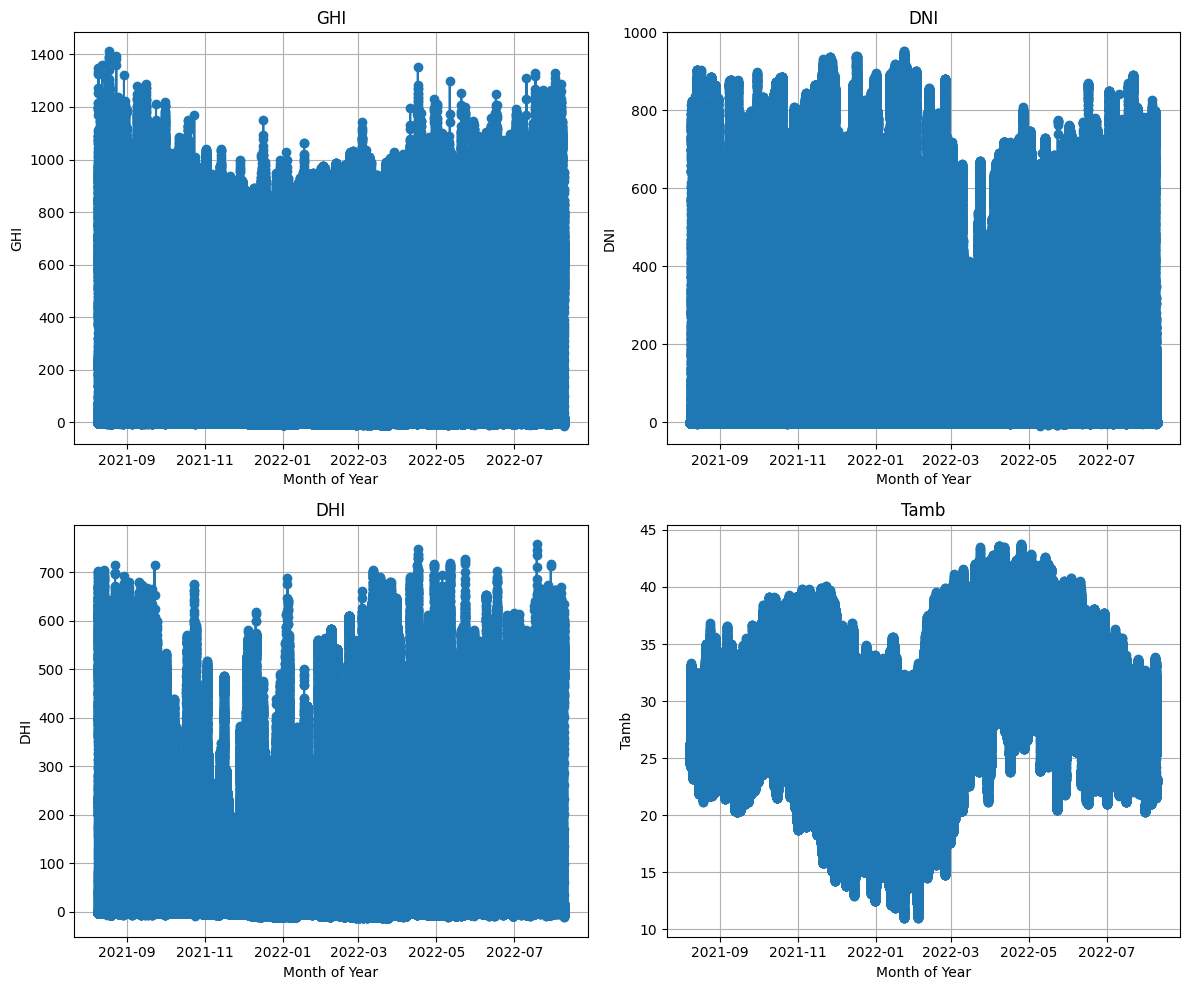

In [4]:
import matplotlib.pyplot as plt

# Accessbile time from Timestamp
df['Timestamp_Adjusted'] = pd.to_datetime(df['Timestamp'])

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

cols = ['GHI','DNI','DHI','Tamb']

for i, col in enumerate(cols):
    # Plotting on each subplot
    if(i < 2):                  
         axs[0, i].plot(df['Timestamp_Adjusted'], df[col], marker='o', linestyle='-')
         axs[0, i].set_title("{}".format(col))
         axs[0, i].set_xlabel('Month of Year')
         axs[0, i].set_ylabel(col)
         axs[0, i].grid(True)
    else:
        axs[1, i-2].plot(df['Timestamp_Adjusted'], df[col], marker='o', linestyle='-')
        axs[1, i-2].set_title("{}".format(col))
        axs[1, i-2].set_xlabel('Month of Year')
        axs[1, i-2].set_ylabel(col)
        axs[1, i-2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


#### Cleaning of Cleaning on ModA, ModB

In [7]:
# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot 'ModA' and 'ModB' on the primary y-axis
ax1.plot(df['Timestamp_Adjusted'], df['ModA'], marker='o', linestyle='-', color='b', label='ModA')
ax1.plot(df['Timestamp_Adjusted'], df['ModB'], marker='o', linestyle='-', color='g', label='ModB')
ax1.set_xlabel('Timestamp_Adjusted')
ax1.set_ylabel('ModA / ModB')
ax1.tick_params(axis='y', labelcolor='b')
ax1.legend(loc='upper left')

# Create a secondary y-axis for 'Cleaning'
ax2 = ax1.twinx()
ax2.plot(df['Timestamp_Adjusted'], df['Cleaning'], color='r', alpha=0.6, label='Cleaning')
ax2.set_ylabel('Cleaning')
ax2.tick_params(axis='y', labelcolor='r')
ax2.legend(loc='upper right')

# Title and grid
plt.title('ModA and ModB Over Time with Cleaning')
ax1.grid(True)

# Show plot
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

#### Correlation Analysis

In [1]:
import seaborn as sns

corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
df_corr = df[corr_columns]
correlation_matrix = df_corr.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()